In [ ]:
pip install -U fortran-magic

In [ ]:
%reload_ext fortranmagic
import py_compile

In [ ]:
!git clone https://github.com/ssanderson/pydata-toolbox

Cloning into 'pydata-toolbox'...
remote: Enumerating objects: 12, done.
remote: Counting objects: 100% (12/12), done.
remote: Compressing objects: 100% (12/12), done.
remote: Total 67 (delta 6), reused 0 (delta 0), pack-reused 55
Unpacking objects: 100% (67/67), done.


In [ ]:
%matplotlib inline
%load_ext fortranmagic

import sys; sys.path.append('..')

import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

mpl.rc('figure', figsize=(12, 7))

ran_the_first_cell = True

jan2017 = pd.to_datetime(['2017-01-03 00:00:00+00:00',
 '2017-01-04 00:00:00+00:00',
 '2017-01-05 00:00:00+00:00',
 '2017-01-06 00:00:00+00:00',
 '2017-01-09 00:00:00+00:00',
 '2017-01-10 00:00:00+00:00',
 '2017-01-11 00:00:00+00:00',
 '2017-01-12 00:00:00+00:00',
 '2017-01-13 00:00:00+00:00',
 '2017-01-17 00:00:00+00:00',
 '2017-01-18 00:00:00+00:00',
 '2017-01-19 00:00:00+00:00',
 '2017-01-20 00:00:00+00:00',
 '2017-01-23 00:00:00+00:00',
 '2017-01-24 00:00:00+00:00',
 '2017-01-25 00:00:00+00:00',
 '2017-01-26 00:00:00+00:00',
 '2017-01-27 00:00:00+00:00',
 '2017-01-30 00:00:00+00:00',
 '2017-01-31 00:00:00+00:00',
 '2017-02-01 00:00:00+00:00'])
calendar = jan2017.values.astype('datetime64[D]')

event_dates = pd.to_datetime(['2017-01-06 00:00:00+00:00', 
                             '2017-01-07 00:00:00+00:00', 
                             '2017-01-08 00:00:00+00:00']).values.astype('datetime64[D]')
event_values = np.array([10, 15, 20])

The fortranmagic extension is already loaded. To reload it, use:
  %reload_ext fortranmagic


<center>
  <h1>The PyData Toolbox</h1>
  <h3>Scott Sanderson (Twitter: @scottbsanderson, GitHub: ssanderson)</h3>
  <h3><a href="https://github.com/ssanderson/pydata-toolbox">https://github.com/ssanderson/pydata-toolbox</a></h3>
</center>

# About Me:

<img src="images/me.jpg" alt="Drawing" style="width: 300px;"/>

- Senior Engineer at [Quantopian](www.quantopian.com)
- Background in Mathematics and Philosophy
- **Twitter:** [@scottbsanderson](https://twitter.com/scottbsanderson)
- **GitHub:** [ssanderson](github.com/ssanderson)

## Outline

- Built-in Data Structures
- Numpy `array`
- Pandas `Series`/`DataFrame`
- Plotting and "Real-World" Analyses

# Data Structures

> Rule 5. Data dominates. If you've chosen the right data structures and organized things well, the algorithms
will almost always be self-evident. Data structures, not algorithms, are central to programming.

- *Notes on Programming in C*, by Rob Pike.

# Lists

In [ ]:
assert ran_the_first_cell, "Oh noes!"



In [ ]:
#ejemplo
assert imthemasterofshift8shift9, "PrintPrintPrint"

In [ ]:
l = [1, 'two', 3.0, 4, 5.0, "six"]
l

[1, 'two', 3.0, 4, 5.0, 'six']

In [ ]:
#ejemplo
sers = [1,8,'two', 'Green', 'bad hometask', 8, 10 ,3.0]
sers

[1, 8, 'two', 'Green', 'bad hometask', 8, 10, 3.0]

In [ ]:
# Lists can be indexed like C-style arrays.
first = l[0]
second = l[1]
print("first:", first)
print("second:", second)

first: 1
second: 2


In [ ]:
#ejemplo
print('Tercero:', sers[2])

Tercero: two


In [ ]:
# Negative indexing gives elements relative to the end of the list.
last = l[-1]
penultimate = l[-2]
print("last:", last)
print("second to last:", penultimate)

last: 5
second to last: 4


In [ ]:
#ejemplo
Fifth = sers[-3]
Fourth = sers[-4]
print("Fifth:", Fifth)
print("Fourth:", Fourth)

Fifth: 8
Fourth: bad hometask


In [ ]:
# Lists can also be sliced, which makes a copy of elements between 
# start (inclusive) and stop (exclusive)
sublist = l[1:3]
sublist

['two', 3.0]

In [ ]:
#ejemplo
listareducida = sers[4:5]
listareducida

['bad hometask']

In [ ]:
# l[:N] is equivalent to l[0:N].
first_three = l[:3]
first_three

[1, 2, 3]

In [ ]:
#ejemplo
primeroscinco = sers[:5]
primeroscinco

[1, 8, 'two', 'Green', 'bad hometask']

In [ ]:
# l[3:] is equivalent to l[3:len(l)].
after_three = l[3:]
after_three

[4, 5]

In [ ]:

#ejemplo
despuesdecinco = sers[5:]
despuesdecinco

[8, 10, 3.0]

In [ ]:
# There's also a third parameter, "step", which gets every Nth element.
l = ['a', 'b', 'c', 'd', 'e', 'f', 'g','h']
l[1:7:2]

['b', 'd', 'f']

In [ ]:
#ejemplo
print(sers)
sers[:8:2]



[1, 8, 'two', 'Green', 'bad hometask', 8, 10, 3.0]


[1, 'two', 'bad hometask', 10]

In [ ]:
# This is a cute way to reverse a list.
l[::-1]

['h', 'g', 'f', 'e', 'd', 'c', 'b', 'a']

In [ ]:
#ejemplo
sers[::-1]

[3.0, 10, 8, 'bad hometask', 'Green', 'two', 8, 1]

In [ ]:
# Lists can be grown efficiently (in O(1) amortized time).
l = [1, 2, 3, 4, 5]
print("Before:", l)
l.append('six')
print("After:", l)

Before: [1, 2, 3, 4, 5]
After: [1, 2, 3, 4, 5, 'six']


In [ ]:
#ejemplo
print(sers)

print("Antes:", sers)
sers.append('Ay pero quejesto')
print("Después:", sers)


[1, 8, 'two', 'Green', 'bad hometask', 8, 10, 3.0]
Antes: [1, 8, 'two', 'Green', 'bad hometask', 8, 10, 3.0]
Después: [1, 8, 'two', 'Green', 'bad hometask', 8, 10, 3.0, 'Ay pero quejesto']


In [ ]:
# Comprehensions let us perform elementwise computations.
l = [1, 2, 3, 4, 5]
[x * 2 for x in l]

[2, 4, 6, 8, 10]

In [ ]:
#ejemplo

import math
numbers= [5,5,2,1,1,651,516515,61561,56156]
[x**math.e for x in numbers]

[79.43235916621322,
 79.43235916621322,
 6.5808859910179205,
 1.0,
 1.0,
 44473987.95603101,
 3386643915090882.0,
 10439568844054.5,
 8131998548803.225]

## Review: Python Lists

- Zero-indexed sequence of arbitrary Python values.
- Slicing syntax: `l[start:stop:step]` copies elements at regular intervals from `start` to `stop`.
- Efficient (`O(1)`) appends and removes from end.
- Comprehension syntax: `[f(x) for x in l if cond(x)]`.

# Dictionaries

In [ ]:
# Dictionaries are key-value mappings.
philosophers = {'David': 'Hume', 'Immanuel': 'Kant', 'Bertrand': 'Russell'}
philosophers

{'Bertrand': 'Russell', 'David': 'Hume', 'Immanuel': 'Kant'}

In [ ]:
#ejemplo
Libros = {'Drama':'A', 'Ciencia' : 'B', 'Terror' : 'C', 'Comedia' :'JS','Amor' : 'D'}
Libros

{'Amor': 'D', 'Ciencia': 'B', 'Comedia': 'JS', 'Drama': 'A', 'Terror': 'C'}

In [ ]:
# Like lists, dictionaries are size-mutable.
philosophers['Ludwig'] = 'Wittgenstein'
philosophers

{'Bertrand': 'Russell',
 'David': 'Hume',
 'Immanuel': 'Kant',
 'Ludwig': 'Wittgenstein'}

In [ ]:
#ejemplo
Libros['Historia'] = 'Carmichael'
Libros

{'Amor': 'D',
 'Ciencia': 'B',
 'Comedia': 'JS',
 'Drama': 'A',
 'Historia': 'Carmichael',
 'Terror': 'C'}

In [ ]:
del philosophers['David']
philosophers

{'Bertrand': 'Russell', 'Immanuel': 'Kant', 'Ludwig': 'Wittgenstein'}

In [ ]:
#ejemplo
del Libros['Amor']

In [ ]:
# No slicing.
philosophers['Bertrand':'Immanuel']

TypeError: ignored

In [ ]:
# efectivamente no funciona
Libros['Amor':'Ciencia']

TypeError: ignored

## Review: Python Dictionaries

- Unordered key-value mapping from (almost) arbitrary keys to arbitrary values.
- Efficient (`O(1)`) lookup, insertion, and deletion.
- No slicing (would require a notion of order).

<center><img src="images/pacino.gif" alt="Drawing" style="width: 100%;"/></center>


In [ ]:
# Suppose we have some matrices...
a = [[1, 2, 3],
     [2, 3, 4],
     [5, 6, 7],
     [1, 1, 1]]

b = [[1, 2, 3, 4],
     [2, 3, 4, 5]]

In [ ]:
#ejemplo
c = [[4,5,6],
     [4,6,6],
     [1,2,3],
     [5, 3, 6]]

d = [[45,9,6,8],
     [10,11,12,13]]

In [ ]:
def matmul(A, B):
    """Multiply matrix A by matrix B."""
    rows_out = len(A)
    cols_out = len(B[0])
    print(cols_out)
    out = [[0 for col in range(cols_out)] for row in range(rows_out)]
    
    for i in range(rows_out):
        for j in range(cols_out):
            for k in range(len(B)):
                out[i][j] += A[i][k] * B[k][j]
    return out

In [ ]:
import math
def matexp(A,B):
  #Multipliacion y exponeciacion de matrices
  matres= matmul(A,B)
  rows = len(matres)
  print(matres)
  columns = len(matres[0])
  for i in range(rows):
    for j in range(columns):
      matres[i][j]= matres[i][j]**math.e

<center><img src="images/gross.gif" alt="Drawing" style="width: 50%;"/></center>


In [ ]:
%%time

matmul(a, b)

4
CPU times: user 539 µs, sys: 0 ns, total: 539 µs
Wall time: 1.46 ms


[[5, 8, 11, 14], [8, 13, 18, 23], [17, 28, 39, 50], [3, 5, 7, 9]]

In [ ]:
%%time

matexp(c,d)

4
[[230, 91, 84, 97], [240, 102, 96, 110], [65, 31, 30, 34], [255, 78, 66, 79]]
CPU times: user 884 µs, sys: 0 ns, total: 884 µs
Wall time: 1.26 ms


In [ ]:
import random
def random_matrix(m, n):
    out = []
    for row in range(m):
        out.append([random.random() for _ in range(n)])
    return out

randm = random_matrix(2, 3)
randm

[[0.7036653910707126, 0.9584124775031356, 0.2944904983245309],
 [0.1659065145422559, 0.9440883107466325, 0.674567902841082]]

In [ ]:
%%time
randa = random_matrix(600, 100)
randb = random_matrix(100, 600)
x = matmul(randa, randb)

600
CPU times: user 7.2 s, sys: 6.81 ms, total: 7.21 s
Wall time: 7.22 s


In [ ]:
%%time
randa = random_matrix(300, 100)
randb = random_matrix(100, 300)
x = matexp(randa, randb);

In [ ]:
# Maybe that's not that bad?  Let's try a simpler case.
def python_dot_product(xs, ys):
    return sum(x * y for x, y in zip(xs, ys))

In [ ]:
def python_exp(lista):
    for i in range(len(lista)):
      return i**math.e

In [ ]:
%%fortran
subroutine fortran_dot_product(xs, ys, result)
    double precision, intent(in) :: xs(:)
    double precision, intent(in) :: ys(:)
    double precision, intent(out) :: result
    
    result = sum(xs * ys)
end

In [ ]:
list_data = [float(i) for i in range(100000)]
array_data = np.array(list_data)

In [ ]:
%%time
python_dot_product(list_data, list_data)

CPU times: user 12.2 ms, sys: 42 µs, total: 12.2 ms
Wall time: 13.9 ms


333328333350000.0

In [ ]:
#ejemplo
%%time
python_exp(list_data)

CPU times: user 8 µs, sys: 0 ns, total: 8 µs
Wall time: 10.5 µs


0.0

In [ ]:
%%time
fortran_dot_product(array_data, array_data)

CPU times: user 216 µs, sys: 0 ns, total: 216 µs
Wall time: 541 µs


333328333350000.0

<center><img src="images/sloth.gif" alt="Drawing" style="width: 1080px;"/></center>


## Why is the Python Version so Much Slower?

In [ ]:
# Dynamic typing.
def mul_elemwise(xs, ys):
    return [x * y for x, y in zip(xs, ys)]

mul_elemwise([1, 2, 3, 4], [1, 2 + 0j, 3.0, 'four'])
#[type(x) for x in _]

[1, (4+0j), 9.0, 'fourfourfourfour']

In [ ]:
# Interpretation overhead.
source_code = 'a + b * c'
bytecode = compile(source_code, '', 'eval')
import dis; dis.dis(bytecode)

  1           0 LOAD_NAME                0 (a)
              2 LOAD_NAME                1 (b)
              4 LOAD_NAME                2 (c)
              6 BINARY_MULTIPLY
              8 BINARY_ADD
             10 RETURN_VALUE


## Why is the Python Version so Slow?
- Dynamic typing means that every single operation requires dispatching on the input type.
- Having an interpreter means that every instruction is fetched and dispatched at runtime.
- Other overheads:
  - Arbitrary-size integers.
  - Reference-counted garbage collection.

> This is the paradox that we have to work with when we're doing scientific or numerically-intensive Python. What makes Python fast for development -- this high-level, interpreted, and dynamically-typed aspect of the language -- is exactly what makes it slow for code execution.

- Jake VanderPlas, [*Losing Your Loops: Fast Numerical Computing with NumPy*](https://www.youtube.com/watch?v=EEUXKG97YRw)

# What Do We Do?

<center><img src="images/runaway.gif" alt="Drawing" style="width: 50%;"/></center>

<center><img src="images/thisisfine.gif" alt="Drawing" style="width: 1080px;"/></center>

- Python is slow for numerical computation because it performs dynamic dispatch on every operation we perform...

- ...but often, we just want to do the same thing over and over in a loop!

- If we don't need Python's dynamicism, we don't want to pay (much) for it.

- **Idea:** Dispatch **once per operation** instead of **once per element**.

In [ ]:
import numpy as np

data = np.array([1, 2, 3, 4])
data

array([1, 2, 3, 4])

In [ ]:
#ejemplo
datos = np.array([10,12,15,18,19])
datos

In [ ]:
data + data

array([2, 4, 6, 8])

In [ ]:
#ejemplo
datos*datos

array([100, 144, 225, 324, 361])

In [ ]:
%%time
# Naive dot product
(array_data * array_data).sum()

CPU times: user 1.31 ms, sys: 0 ns, total: 1.31 ms
Wall time: 1.4 ms


333328333350000.0

In [ ]:
#ejemplo
%%time

(datos**math.e).sum()


CPU times: user 152 µs, sys: 0 ns, total: 152 µs
Wall time: 157 µs


8530.299158519803

In [ ]:
%%time
# Built-in dot product.
array_data.dot(array_data)


CPU times: user 328 µs, sys: 2.99 ms, total: 3.32 ms
Wall time: 3.06 ms


333328333350000.0

In [ ]:
#ejemplo
%%time
datos.cumsum(axis=0)

CPU times: user 30 µs, sys: 0 ns, total: 30 µs
Wall time: 34.8 µs


array([10, 22, 37, 55, 74])

In [ ]:
%%time
fortran_dot_product(array_data, array_data)

In [ ]:
# Numpy won't allow us to write a string into an int array.
data[0] = "foo"

In [ ]:
# We also can't grow an array once it's created.
data.append(3)

In [ ]:
# We **can** reshape an array though.
two_by_two = data.reshape(2, 2)
two_by_two

Numpy arrays are:

- Fixed-type

- Size-immutable

- Multi-dimensional

- Fast\*

\* If you use them correctly.

# What's in an Array?

In [ ]:
arr = np.array([1, 2, 3, 4, 5, 6], dtype='int16').reshape(2, 3)
print("Array:\n", arr, sep='')
print("===========")
print("DType:", arr.dtype)
print("Shape:", arr.shape)
print("Strides:", arr.strides)
print("Data:", arr.data.tobytes())

Array:
[[1 2 3]
 [4 5 6]]
DType: int16
Shape: (2, 3)
Strides: (6, 2)
Data: b'\x01\x00\x02\x00\x03\x00\x04\x00\x05\x00\x06\x00'


In [ ]:
#ejemplo

datat = np.array([145,15,651,15615,13,3.0,5,10,10,5,844546,9,12,1,54,78798,78789,47]  ).reshape(9, 2)
print("Array:\n", datat, sep='')
print("===========")
print("DType:", datat.dtype)
print("Shape:", datat.shape)
print("Strides:", datat.strides)
print("Data:", datat.data.tobytes())

Array:
[[1.45000e+02 1.50000e+01]
 [6.51000e+02 1.56150e+04]
 [1.30000e+01 3.00000e+00]
 [5.00000e+00 1.00000e+01]
 [1.00000e+01 5.00000e+00]
 [8.44546e+05 9.00000e+00]
 [1.20000e+01 1.00000e+00]
 [5.40000e+01 7.87980e+04]
 [7.87890e+04 4.70000e+01]]
DType: float64
Shape: (9, 2)
Strides: (16, 8)
Data: b'\x00\x00\x00\x00\x00 b@\x00\x00\x00\x00\x00\x00.@\x00\x00\x00\x00\x00X\x84@\x00\x00\x00\x00\x80\x7f\xce@\x00\x00\x00\x00\x00\x00*@\x00\x00\x00\x00\x00\x00\x08@\x00\x00\x00\x00\x00\x00\x14@\x00\x00\x00\x00\x00\x00$@\x00\x00\x00\x00\x00\x00$@\x00\x00\x00\x00\x00\x00\x14@\x00\x00\x00\x00\x04\xc6)A\x00\x00\x00\x00\x00\x00"@\x00\x00\x00\x00\x00\x00(@\x00\x00\x00\x00\x00\x00\xf0?\x00\x00\x00\x00\x00\x00K@\x00\x00\x00\x00\xe0<\xf3@\x00\x00\x00\x00P<\xf3@\x00\x00\x00\x00\x00\x80G@'


# Core Operations

- Vectorized **ufuncs** for elementwise operations.
- Fancy indexing and masking for selection and filtering.
- Aggregations across axes.
- Broadcasting

# UFuncs

UFuncs (universal functions) are functions that operate elementwise on one or more arrays.

In [ ]:
data = np.arange(15).reshape(3, 5)
data

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14]])

In [ ]:
#ejemplo

datos = np.arange(50).reshape(10,5)
datos

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14],
       [15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24],
       [25, 26, 27, 28, 29],
       [30, 31, 32, 33, 34],
       [35, 36, 37, 38, 39],
       [40, 41, 42, 43, 44],
       [45, 46, 47, 48, 49]])

In [ ]:
# Binary operators.
data * data

array([[  0,   1,   4,   9,  16],
       [ 25,  36,  49,  64,  81],
       [100, 121, 144, 169, 196]])

In [ ]:
#ejemplo

datos**datos

array([[                   1,                    1,                    4,
                          27,                  256],
       [                3125,                46656,               823543,
                    16777216,            387420489],
       [         10000000000,         285311670611,        8916100448256,
             302875106592253,    11112006825558016],
       [  437893890380859375,                    0, -2863221430593058543,
         -497033925936021504,  6353754964178307979],
       [-2101438300051996672, -1595931050845505211,  4981753131911086080,
         8450172506621111015,                    0],
       [-6776596920136667815, -1123307876295639040, -5278486589563110205,
        -6845471433603153920,  5529354540715494413],
       [ 2565992168703393792, -4642015662142636065,                    0,
        -4053175462519618527, -5296008294479953920],
       [ 8407224849895527163,                    0, -4689350456247753643,
         6543552412563537920, -879564

In [ ]:
# Unary functions.
np.sqrt(data)

array([[0.        , 1.        , 1.41421356, 1.73205081, 2.        ],
       [2.23606798, 2.44948974, 2.64575131, 2.82842712, 3.        ],
       [3.16227766, 3.31662479, 3.46410162, 3.60555128, 3.74165739]])

In [ ]:
np.sin(datos)

array([[ 0.        ,  0.84147098,  0.90929743,  0.14112001, -0.7568025 ],
       [-0.95892427, -0.2794155 ,  0.6569866 ,  0.98935825,  0.41211849],
       [-0.54402111, -0.99999021, -0.53657292,  0.42016704,  0.99060736],
       [ 0.65028784, -0.28790332, -0.96139749, -0.75098725,  0.14987721],
       [ 0.91294525,  0.83665564, -0.00885131, -0.8462204 , -0.90557836],
       [-0.13235175,  0.76255845,  0.95637593,  0.27090579, -0.66363388],
       [-0.98803162, -0.40403765,  0.55142668,  0.99991186,  0.52908269],
       [-0.42818267, -0.99177885, -0.64353813,  0.29636858,  0.96379539],
       [ 0.74511316, -0.15862267, -0.91652155, -0.83177474,  0.01770193],
       [ 0.85090352,  0.90178835,  0.12357312, -0.76825466, -0.95375265]])

In [ ]:
# Comparison operations
(data % 3) == 0

array([[ True, False, False,  True, False],
       [False,  True, False, False,  True],
       [False, False,  True, False, False],
       [ True, False, False,  True, False],
       [False,  True, False, False,  True]])

In [ ]:
#ejemplo

(datos**5)>500

array([[False, False, False, False,  True],
       [ True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True]])

In [ ]:
# Boolean combinators.
((data % 2) == 0) & ((data % 3) == 0)

array([[ True, False, False, False, False],
       [False,  True, False, False, False],
       [False, False,  True, False, False],
       [False, False, False,  True, False],
       [False, False, False, False,  True]])

In [ ]:
#ejemplo

((datos**5)>100) & ((datos**5)<10000)

array([[False, False, False,  True,  True],
       [ True,  True, False, False, False],
       [False, False, False, False, False],
       [False, False, False, False, False],
       [False, False, False, False, False],
       [False, False, False, False, False],
       [False, False, False, False, False],
       [False, False, False, False, False],
       [False, False, False, False, False],
       [False, False, False, False, False]])

In [ ]:
# as of python 3.5, @ is matrix-multiply
data @ data.T

array([[ 30,  80, 130],
       [ 80, 255, 430],
       [130, 430, 730]])

In [ ]:
#ejemplo
datos*5 @  datos.T

array([[  150,   400,   650,   900,  1150,  1400,  1650,  1900,  2150,
         2400],
       [  400,  1275,  2150,  3025,  3900,  4775,  5650,  6525,  7400,
         8275],
       [  650,  2150,  3650,  5150,  6650,  8150,  9650, 11150, 12650,
        14150],
       [  900,  3025,  5150,  7275,  9400, 11525, 13650, 15775, 17900,
        20025],
       [ 1150,  3900,  6650,  9400, 12150, 14900, 17650, 20400, 23150,
        25900],
       [ 1400,  4775,  8150, 11525, 14900, 18275, 21650, 25025, 28400,
        31775],
       [ 1650,  5650,  9650, 13650, 17650, 21650, 25650, 29650, 33650,
        37650],
       [ 1900,  6525, 11150, 15775, 20400, 25025, 29650, 34275, 38900,
        43525],
       [ 2150,  7400, 12650, 17900, 23150, 28400, 33650, 38900, 44150,
        49400],
       [ 2400,  8275, 14150, 20025, 25900, 31775, 37650, 43525, 49400,
        55275]])

# UFuncs Review

- UFuncs provide efficient elementwise operations applied across one or more arrays.
- Arithmetic Operators (`+`, `*`, `/`)
- Comparisons (`==`, `>`, `!=`)
- Boolean Operators (`&`, `|`, `^`)
- Trigonometric Functions (`sin`, `cos`)
- Transcendental Functions (`exp`, `log`)

# Selections

We often want to perform an operation on just a subset of our data.

In [ ]:
sines = np.sin(np.linspace(0, 3.14, 10))
cosines = np.cos(np.linspace(0, 3.14, 10))
sines

array([0.        , 0.34185385, 0.64251645, 0.86575984, 0.98468459,
       0.98496101, 0.8665558 , 0.64373604, 0.34335012, 0.00159265])

In [ ]:
#ejemplo
arcosenos = np.arcsin(np.linspace(0,1,30))
arcosenos

array([0.        , 0.0344896 , 0.0690203 , 0.10363368, 0.13837218,
       0.17327964, 0.20840181, 0.24378694, 0.27948646, 0.31555575,
       0.3520551 , 0.38905083, 0.42661668, 0.46483561, 0.50380198,
       0.54362451, 0.58443007, 0.62636896, 0.669622  , 0.71441082,
       0.76101275, 0.80978357, 0.86119347, 0.91588747, 0.97479389,
       1.03933809, 1.11192212, 1.1972374 , 1.30742291, 1.57079633])

In [ ]:
# Slicing works with the same semantics as Python lists.
sines[0]

0.0

In [ ]:
#ejemplo
arcosenos[5]

0.17327963641754074

In [ ]:
sines[:3]  # First three elements  

array([0.        , 0.34185385, 0.64251645])

In [ ]:
#ejemplo
arcosenos[:6]

array([0.        , 0.0344896 , 0.0690203 , 0.10363368, 0.13837218,
       0.17327964])

In [ ]:
sines[5:]  # Elements from 5 on.

array([0.98496101, 0.8665558 , 0.64373604, 0.34335012, 0.00159265])

In [ ]:
arcosenos[10:]

array([0.3520551 , 0.38905083, 0.42661668, 0.46483561, 0.50380198,
       0.54362451, 0.58443007, 0.62636896, 0.669622  , 0.71441082,
       0.76101275, 0.80978357, 0.86119347, 0.91588747, 0.97479389,
       1.03933809, 1.11192212, 1.1972374 , 1.30742291, 1.57079633])

In [ ]:
sines[::2]  # Every other element.

array([0.        , 0.64251645, 0.98468459, 0.8665558 , 0.34335012])

In [ ]:
#ejemplo

arcosenos[::-1]

array([1.57079633, 1.30742291, 1.1972374 , 1.11192212, 1.03933809,
       0.97479389, 0.91588747, 0.86119347, 0.80978357, 0.76101275,
       0.71441082, 0.669622  , 0.62636896, 0.58443007, 0.54362451,
       0.50380198, 0.46483561, 0.42661668, 0.38905083, 0.3520551 ,
       0.31555575, 0.27948646, 0.24378694, 0.20840181, 0.17327964,
       0.13837218, 0.10363368, 0.0690203 , 0.0344896 , 0.        ])

In [ ]:
# More interesting: we can index with boolean arrays to filter by a predicate.
print("sines:\n", sines)
print("sines > 0.5:\n", sines > 0.5)
print("sines[sines > 0.5]:\n", sines[sines > 0.5])

sines:
 [0.         0.34185385 0.64251645 0.86575984 0.98468459 0.98496101
 0.8665558  0.64373604 0.34335012 0.00159265]
sines > 0.5:
 [False False  True  True  True  True  True  True False False]
sines[sines > 0.5]:
 [0.64251645 0.86575984 0.98468459 0.98496101 0.8665558  0.64373604]


In [ ]:
#ejemplo
print("arcosenos:\n", arcosenos)
print("arcosenos > 0.5:\n", arcosenos > 0.5)
print("arcosenos[arcosenos > 0.5]:\n", arcosenos[arcosenos > 0.5])

arcosenos:
 [0.         0.0344896  0.0690203  0.10363368 0.13837218 0.17327964
 0.20840181 0.24378694 0.27948646 0.31555575 0.3520551  0.38905083
 0.42661668 0.46483561 0.50380198 0.54362451 0.58443007 0.62636896
 0.669622   0.71441082 0.76101275 0.80978357 0.86119347 0.91588747
 0.97479389 1.03933809 1.11192212 1.1972374  1.30742291 1.57079633]
arcosenos > 0.5:
 [False False False False False False False False False False False False
 False False  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True]
arcosenos[arcosenos > 0.5]:
 [0.50380198 0.54362451 0.58443007 0.62636896 0.669622   0.71441082
 0.76101275 0.80978357 0.86119347 0.91588747 0.97479389 1.03933809
 1.11192212 1.1972374  1.30742291 1.57079633]


In [ ]:
# We index with lists/arrays of integers to select values at those indices.
print(sines)
sines[[0, 4, 7]]

[0.         0.34185385 0.64251645 0.86575984 0.98468459 0.98496101
 0.8665558  0.64373604 0.34335012 0.00159265]


array([0.        , 0.98468459, 0.64373604])

In [ ]:
#ejemplo
print(arcosenos)
arcosenos[[10,20,29]]

[0.         0.0344896  0.0690203  0.10363368 0.13837218 0.17327964
 0.20840181 0.24378694 0.27948646 0.31555575 0.3520551  0.38905083
 0.42661668 0.46483561 0.50380198 0.54362451 0.58443007 0.62636896
 0.669622   0.71441082 0.76101275 0.80978357 0.86119347 0.91588747
 0.97479389 1.03933809 1.11192212 1.1972374  1.30742291 1.57079633]


array([0.3520551 , 0.76101275, 1.57079633])

In [ ]:
# Index arrays are often used for sorting one or more arrays.
unsorted_data = np.array([1, 3, 2, 12, -1, 5, 2])

In [ ]:
#ejemplo
unarranged= np.array([-8,5,9,8,-7,54,-1,15,6,9,1,2,4,0])

In [ ]:
sort_indices = np.argsort(unsorted_data)
sort_indices

array([4, 0, 2, 6, 1, 5, 3])

In [ ]:
#ejemplo
arranged =np.argsort(unarranged)
arranged

array([ 0,  4,  6, 13, 10, 11, 12,  1,  8,  3,  2,  9,  7,  5])

In [ ]:
unsorted_data[sort_indices]

array([-1,  1,  2,  2,  3,  5, 12])

In [ ]:
#ejemplo
unarranged[arranged]

array([-8, -7, -1,  0,  1,  2,  4,  5,  6,  8,  9,  9, 15, 54])

In [ ]:
market_caps = np.array([12, 6, 10, 5, 6])  # Presumably in dollars?
assets = np.array(['A', 'B', 'C', 'D', 'E'])

In [ ]:
# Sort assets by market cap by using the permutation that would sort market caps on ``assets``.
sort_by_mcap = np.argsort(market_caps)
assets[sort_by_mcap]

array(['D', 'B', 'E', 'C', 'A'], dtype='<U1')

In [ ]:
# Indexers are also useful for aligning data.
print("Dates:\n", repr(event_dates))
print("Values:\n", repr(event_values))
print("Calendar:\n", repr(calendar))

Dates:
 array(['2017-01-06', '2017-01-07', '2017-01-08'], dtype='datetime64[D]')
Values:
 array([10, 15, 20])
Calendar:
 array(['2017-01-03', '2017-01-04', '2017-01-05', '2017-01-06',
       '2017-01-09', '2017-01-10', '2017-01-11', '2017-01-12',
       '2017-01-13', '2017-01-17', '2017-01-18', '2017-01-19',
       '2017-01-20', '2017-01-23', '2017-01-24', '2017-01-25',
       '2017-01-26', '2017-01-27', '2017-01-30', '2017-01-31',
       '2017-02-01'], dtype='datetime64[D]')


In [ ]:
print("Raw Dates:", event_dates)
print("Indices:", calendar.searchsorted(event_dates))
print("Forward-Filled Dates:", calendar[calendar.searchsorted(event_dates)])

Raw Dates: ['2017-01-06' '2017-01-07' '2017-01-08']
Indices: [3 4 4]
Forward-Filled Dates: ['2017-01-06' '2017-01-09' '2017-01-09']


On multi-dimensional arrays, we can slice along each axis independently.

In [ ]:
data = np.arange(25).reshape(5, 5)
data

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14],
       [15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24]])

In [ ]:
data[:2, :2]  # First two rows and first two columns.

array([[0, 1],
       [5, 6]])

In [ ]:
data[:2, [0, -1]]  # First two rows, first and last columns.

array([[0, 4],
       [5, 9]])

In [ ]:
data[(data[:, 0] % 2) == 0]  # Rows where the first column is divisible by two.

array([[ 0,  1,  2,  3,  4],
       [10, 11, 12, 13, 14],
       [20, 21, 22, 23, 24]])

# Selections Review

- Indexing with an integer removes a dimension.
- Slicing operations work on Numpy arrays the same way they do on lists.
- Indexing with a boolean array filters to True locations.
- Indexing with an integer array selects indices along an axis.
- Multidimensional arrays can apply selections independently along different axes.

## Reductions

Functions that reduce an array to a scalar.

$Var(X) = \frac{1}{N}\sqrt{\sum_{i=1}^N (x_i - \bar{x})^2}$

In [ ]:
def variance(x):
    return ((x - x.mean()) ** 2).sum() / len(x)

In [ ]:
#ejemplo
def malditasea(x):
  return (x.sum())

In [ ]:
variance(np.random.standard_normal(1000))

0.9395475877908489

In [ ]:
#ejemplo
dats= malditasea(np.random.standard_exponential(50))
dats

- `sum()` and `mean()` are both **reductions**.

- In the simplest case, we use these to reduce an entire array into a single value...

In [ ]:
data = np.arange(30)
data.mean()

14.5

In [ ]:
#ejemplo
dats.mean()

45.122017445854546

- ...but we can do more interesting things with multi-dimensional arrays.

In [ ]:
data = np.arange(30).reshape(3, 10)
data

array([[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24, 25, 26, 27, 28, 29]])

In [ ]:
#ejemplo
dats = np.arange(50).reshape(5,10)
dats

array([[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24, 25, 26, 27, 28, 29],
       [30, 31, 32, 33, 34, 35, 36, 37, 38, 39],
       [40, 41, 42, 43, 44, 45, 46, 47, 48, 49]])

In [ ]:
data.mean()

14.5

In [ ]:
#ejemplo
dats.mean()

24.5

In [ ]:
data.mean(axis=0)

array([10., 11., 12., 13., 14., 15., 16., 17., 18., 19.])

In [ ]:
#ejemplo
dats.prod(axis=0)

array([      0,  293601,  709632, 1272843, 2010624, 2953125, 4133376,
       5587407, 7354368, 9476649])

In [ ]:
data.mean(axis=1)

array([ 4.5, 14.5, 24.5])

In [ ]:
#ejemplo
dats.prod(axis=1)

array([                0,      335221286400,    72684900288000,
        2306992893004800, 29820834418636800])

## Reductions Review

- Reductions allow us to perform efficient aggregations over arrays.
- We can do aggregations over a single axis to collapse a single dimension.
- Many built-in reductions (`mean`, `sum`, `min`, `max`, `median`, ...).

# Broadcasting

In [ ]:
row = np.array([1, 2, 3, 4])
column = np.array([[1], [2], [3]])
print("Row:\n", row, sep='')
print("Column:\n", column, sep='')

Row:
[1 2 3 4]
Column:
[[1]
 [2]
 [3]]


In [ ]:
#ejemplo
rows=np.random.randint(100,size=10)
columns= np.random.randint(100,size=10).reshape(10,1)
print("Row:\n", rows, sep='')
print("Column:\n", columns, sep='')

Row:
[54  0 63 21 70 99 36 43 39 52]
Column:
[[21]
 [54]
 [34]
 [86]
 [89]
 [25]
 [67]
 [42]
 [ 6]
 [61]]


In [ ]:
row + column

array([[2, 3, 4, 5],
       [3, 4, 5, 6],
       [4, 5, 6, 7]])

In [ ]:
#ejemplo
rows**columns

array([[ -346853461916123136,                    0,  3938877570236998975,
        -1595931050845505211, -8096584236080824320,  8316779445081587859,
         8981483876790566912, -9145467812007299077,  7948846282831898311,
         9031533646086930432],
       [ 2467972595799031808,                    0,  2141226595087114881,
        -6220150614318536663, -5314247560297185280,  1499810436572878681,
                           0, -3103577778546428759, -5002787545000972463,
                           0],
       [ 2585850567397998592,                    0, -7666593895011907711,
        -7443653418300485831, -7602202460219768832, -8729925530841785143,
                           0, -8941377572527772487,   722917302221958385,
                           0],
       [                   0,                    0, -4551597014788056447,
         4293445397131009449,                    0, -3949365111721560615,
                           0,  7923188178090148393,  -397926391061678511,
                   

<center><img src="images/broadcasting.png" alt="Drawing" style="width: 60%;"/></center>

<h5>Source: http://www.scipy-lectures.org/_images/numpy_broadcasting.png</h5>

In [ ]:
# Broadcasting is particularly useful in conjunction with reductions.
print("Data:\n", data, sep='')
print("Mean:\n", data.mean(axis=0), sep='')
print("Data - Mean:\n", data - data.mean(axis=0), sep='')

Data:
[[ 0  1  2  3  4  5  6  7  8  9]
 [10 11 12 13 14 15 16 17 18 19]
 [20 21 22 23 24 25 26 27 28 29]]
Mean:
[10. 11. 12. 13. 14. 15. 16. 17. 18. 19.]
Data - Mean:
[[-10. -10. -10. -10. -10. -10. -10. -10. -10. -10.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [ 10.  10.  10.  10.  10.  10.  10.  10.  10.  10.]]


In [ ]:
print("Data:\n", dats, sep='')
print("Mean:\n", dats.mean(axis=1), sep='')
print("Data - Mean:\n", dats - dats.prod(axis=0), sep='')

Data:
[[ 0  1  2  3  4  5  6  7  8  9]
 [10 11 12 13 14 15 16 17 18 19]
 [20 21 22 23 24 25 26 27 28 29]
 [30 31 32 33 34 35 36 37 38 39]
 [40 41 42 43 44 45 46 47 48 49]]
Mean:
[ 4.5 14.5 24.5 34.5 44.5]
Data - Mean:
[[       0  -293600  -709630 -1272840 -2010620 -2953120 -4133370 -5587400
  -7354360 -9476640]
 [      10  -293590  -709620 -1272830 -2010610 -2953110 -4133360 -5587390
  -7354350 -9476630]
 [      20  -293580  -709610 -1272820 -2010600 -2953100 -4133350 -5587380
  -7354340 -9476620]
 [      30  -293570  -709600 -1272810 -2010590 -2953090 -4133340 -5587370
  -7354330 -9476610]
 [      40  -293560  -709590 -1272800 -2010580 -2953080 -4133330 -5587360
  -7354320 -9476600]]


# Broadcasting Review

- Numpy operations can work on arrays of different dimensions as long as the arrays' shapes are still "compatible".
- Broadcasting works by "tiling" the smaller array along the missing dimension.
- The result of a broadcasted operation is always at least as large in each dimension as the largest array in that dimension.

# Numpy Review

- Numerical algorithms are slow in pure Python because the overhead dynamic dispatch dominates our runtime.

- Numpy solves this problem by:
  1. Imposing additional restrictions on the contents of arrays.
  2. Moving the inner loops of our algorithms into compiled C code.

- Using Numpy effectively often requires reworking an algorithms to use vectorized operations instead of for-loops, but the resulting operations are usually simpler, clearer, and faster than the pure Python equivalent.

<center><img src="images/unicorn.jpg" alt="Drawing" style="width: 75%;"/></center>

Numpy is great for many things, but...

- Sometimes our data is equipped with a natural set of **labels**:
  - Dates/Times
  - Stock Tickers
  - Field Names (e.g. Open/High/Low/Close)

- Sometimes we have **more than one type of data** that we want to keep grouped together.
  - Tables with a mix of real-valued and categorical data.

- Sometimes we have **missing** data, which we need to ignore, fill, or otherwise work around.

<center><img src="images/panda-wrangling.gif" alt="Drawing" style="width: 75%;"/></center>

<center><img src="images/pandas_logo.png" alt="Drawing" style="width: 75%;"/></center>


Pandas extends Numpy with more complex data structures:

- `Series`: 1-dimensional, homogenously-typed, labelled array.
- `DataFrame`: 2-dimensional, semi-homogenous, labelled table.

Pandas also provides many utilities for: 
- Input/Output
- Data Cleaning
- Rolling Algorithms
- Plotting

# Selection in Pandas

In [ ]:
s = pd.Series(index=['a', 'b', 'c', 'd', 'e'], data=[1, 2, 3, 4, 5])
s

a    1
b    2
c    3
d    4
e    5
dtype: int64

In [ ]:
#ejemplo

datos = pd.Series()

In [ ]:
# There are two pieces to a Series: the index and the values.
print("The index is:", s.index)
print("The values are:", s.values)

The index is: Index(['a', 'b', 'c', 'd', 'e'], dtype='object')
The values are: [1 2 3 4 5]


In [ ]:
# We can look up values out of a Series by position...
s.iloc[0]

1

In [ ]:
# ... or by label.
s.loc['a']

1

In [ ]:
# Slicing works as expected...
s.iloc[:2]

a    1
b    2
dtype: int64

In [ ]:
# ...but it works with labels too!
s.loc[:'c']

a    1
b    2
c    3
dtype: int64

In [ ]:
# Fancy indexing works the same as in numpy.
s.iloc[[0, -1]]

a    1
e    5
dtype: int64

In [ ]:
# As does boolean masking.
s.loc[s > 2]

c    3
d    4
e    5
dtype: int64

In [ ]:
# Element-wise operations are aligned by index.
other_s = pd.Series({'a': 10.0, 'c': 20.0, 'd': 30.0, 'z': 40.0})
other_s

a    10.0
c    20.0
d    30.0
z    40.0
dtype: float64

In [ ]:
s + other_s

a    11.0
b     NaN
c    23.0
d    34.0
e     NaN
z     NaN
dtype: float64

In [ ]:
# We can fill in missing values with fillna().
(s + other_s).fillna(0.0)

a    11.0
b     0.0
c    23.0
d    34.0
e     0.0
z     0.0
dtype: float64

In [ ]:
# Most real datasets are read in from an external file format.

import pandas_datareader as pdr
import datetime
msft=pdr.get_data_yahoo('MSFT', start= datetime.datetime(2018,1,1), end= datetime.datetime(2019,1,1))
msft.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2018-01-02,86.309998,85.500000,86.129997,85.949997,22483800.0,82.194328
2018-01-03,86.510002,85.970001,86.059998,86.349998,26061400.0,82.576843
2018-01-04,87.660004,86.570000,86.589996,87.110001,21912000.0,83.303658
2018-01-05,88.410004,87.430000,87.660004,88.190002,23407100.0,84.336464
2018-01-08,88.580002,87.599998,88.199997,88.279999,22113000.0,84.422516


In [ ]:
#ejemplo
import pandas_datareader as pdr
import datetime
msft=pdr.get_data_yahoo('TSLA', start= datetime.datetime(2018,1,1), end= datetime.datetime(2021,1,1))
msft.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-12-24,666.090027,641.000000,642.98999,661.770020,22865600.0,661.770020
2020-12-28,681.400024,660.799988,674.51001,663.690002,32278600.0,663.690002
2020-12-29,669.900024,655.000000,661.00000,665.989990,22910800.0,665.989990
2020-12-30,696.599976,668.359985,672.00000,694.780029,42846000.0,694.780029
2020-12-31,718.719971,691.119995,699.98999,705.669983,49649900.0,705.669983


In [ ]:
# Slicing generalizes to two dimensions as you'd expect:
aapl.iloc[:2, :2]

,High,Low
Date,,
2021-03-01,719.000000,685.049988
2021-03-02,721.109985,685.000000


In [ ]:
#ejemplo
msft.iloc[:10, :3]

,High,Low,Open
Date,,,
2018-01-02,64.421997,62.200001,62.400002
2018-01-03,65.050003,63.110001,64.199997
2018-01-04,63.709999,61.136002,62.574001
2018-01-05,63.448002,62.400002,63.324001
2018-01-08,67.403999,63.099998,63.200001
2018-01-09,67.760002,65.480003,67.031998
2018-01-10,67.400002,66.000000,66.440002
2018-01-11,68.961998,66.652000,67.047997
2018-01-12,68.082001,66.734001,67.725998


In [ ]:
aapl.loc[pd.Timestamp('2010-02-01'):pd.Timestamp('2010-02-04'), ['Close', 'Volume']]

,Close,Volume
Date,,


In [ ]:
#ejemplo
msft.loc[pd.Timestamp('2019-02-01'):pd.Timestamp('2019-02-04'), ['Close', 'Volume','High']]


,Close,Volume,High
Date,,,
2019-02-01,62.442001,36417000.0,63.220001
2019-02-04,62.577999,36760500.0,63.060001


# Rolling Operations

<center><img src="images/rolling.gif" alt="Drawing" style="width: 75%;"/></center>

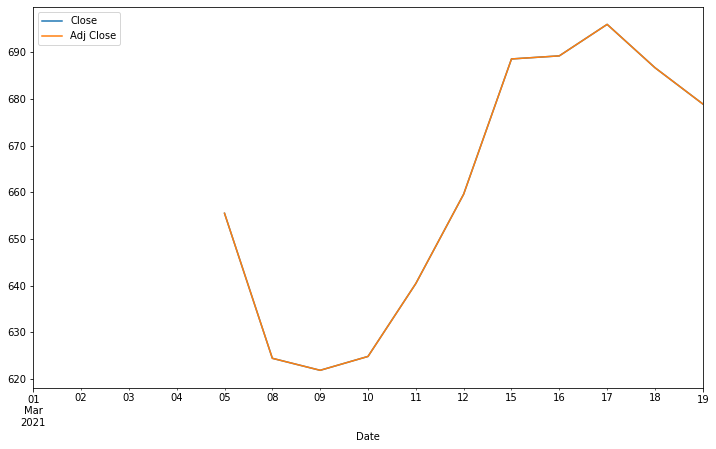

In [ ]:
aapl.rolling(5)[['Close', 'Adj Close']].mean().plot();

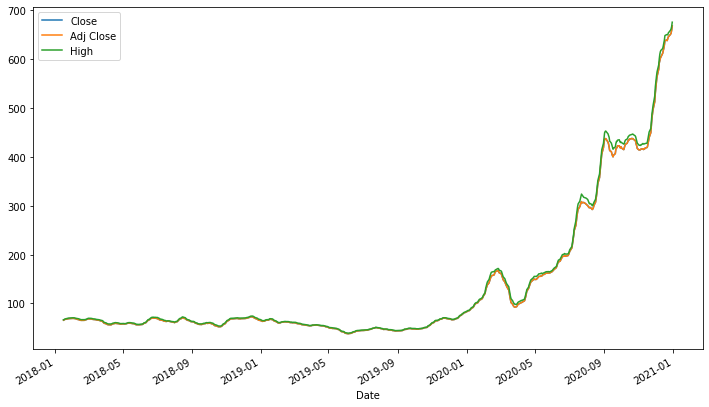

In [ ]:
#ejemplo
msft.rolling(10)[['Close', 'Adj Close','High']].mean().plot();
msft.rolling?

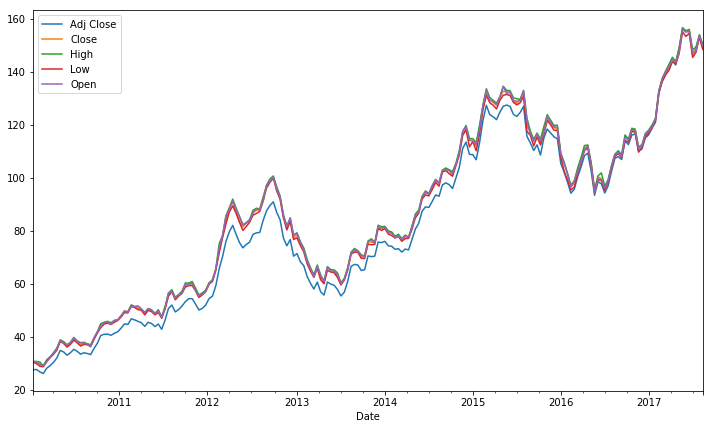

In [ ]:
# Drop `Volume`, since it's way bigger than everything else.
aapl.drop('Volume', axis=1).resample('2W').max().plot();

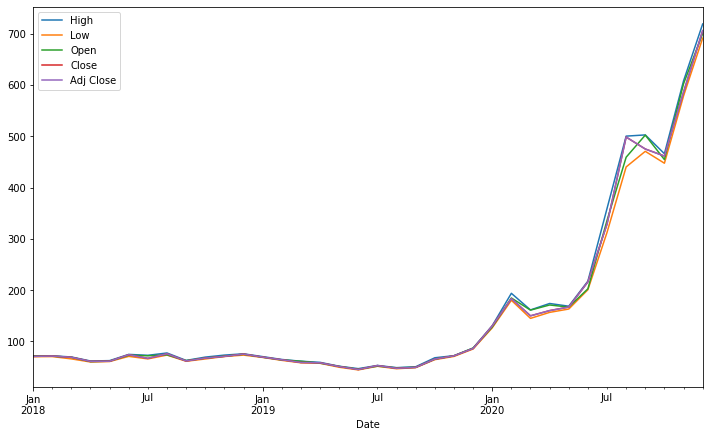

In [ ]:
#ejemplo
msft.drop('Volume', axis=1).resample('M').max().plot();
msft.drop?

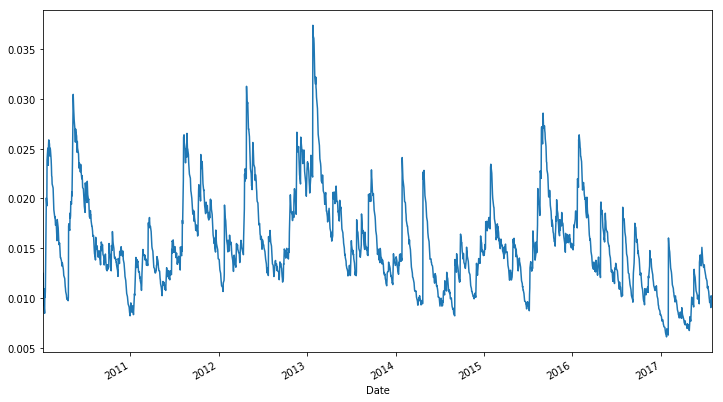

In [ ]:
# 30-day rolling exponentially-weighted stddev of returns.
aapl['Close'].pct_change().ewm(span=30).std().plot();

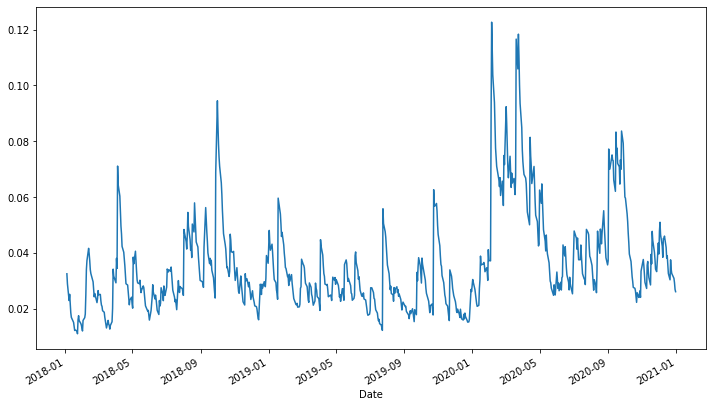

In [ ]:
msft['Low'].pct_change().ewm(span=10).std().plot();

# "Real World" Data

In [ ]:
from demos.avocados import read_avocadata

avocados = read_avocadata('2014', '2016')
avocados.head()

,Date,Region,Variety,Organic,Number of Stores,Weighted Avg Price,Low Price,High Price
0,2014-01-03 00:00:00+00:00,NATIONAL,HASS,False,9184,0.93,NaN,NaN
1,2014-01-03 00:00:00+00:00,NATIONAL,HASS,True,872,1.44,NaN,NaN
2,2014-01-03 00:00:00+00:00,NORTHEAST,HASS,False,1449,1.08,0.5,1.67
3,2014-01-03 00:00:00+00:00,NORTHEAST,HASS,True,66,1.54,1.5,2.00
4,2014-01-03 00:00:00+00:00,SOUTHEAST,HASS,False,2286,0.98,0.5,1.99


In [ ]:
from demos.avocados import read_avocadata

avocadosex = read_avocadata('2015-1-1','2015-8-1')
avocadosex 

,Date,Region,Variety,Organic,Number of Stores,Weighted Avg Price,Low Price,High Price
0,2014-01-03 00:00:00+00:00,NATIONAL,HASS,False,9184,0.93,NaN,NaN
1,2014-01-03 00:00:00+00:00,NATIONAL,HASS,True,872,1.44,NaN,NaN
2,2014-01-03 00:00:00+00:00,NORTHEAST,HASS,False,1449,1.08,0.50,1.67
3,2014-01-03 00:00:00+00:00,NORTHEAST,HASS,True,66,1.54,1.50,2.00
4,2014-01-03 00:00:00+00:00,SOUTHEAST,HASS,False,2286,0.98,0.50,1.99
...,...,...,...,...,...,...,...,...
1938,2015-12-18 00:00:00+00:00,SOUTHWEST,GREENSKIN,False,48,0.16,0.16,0.16
1939,2015-12-18 00:00:00+00:00,NORTHWEST,HASS,False,676,1.45,0.68,2.50
1940,2015-12-18 00:00:00+00:00,NORTHWEST,HASS,True,40,1.55,1.50,1.67
1941,2015-12-18 00:00:00+00:00,ALASKA,HASS,False,11,1.90,1.50,1.99


In [ ]:
# Unlike numpy arrays, pandas DataFrames can have a different dtype for each column.
avocados.dtypes

Date                  datetime64[ns, UTC]
Region                             object
Variety                            object
Organic                              bool
Number of Stores                    int64
Weighted Avg Price                float64
Low Price                         float64
High Price                        float64
dtype: object

In [ ]:
avocadosex.describe()

,Number of Stores,Weighted Avg Price,Low Price,High Price
count,1830.000000,1830.000000,1535.000000,1535.000000
mean,1125.601093,1.381126,1.015107,1.846834
std,2094.632033,0.409184,0.553679,0.511740
min,2.000000,0.160000,0.100000,0.160000
25%,54.250000,1.080000,0.590000,1.500000
50%,385.500000,1.280000,0.990000,1.990000
75%,1358.750000,1.580000,1.500000,2.095000
max,19762.000000,3.880000,3.000000,5.000000


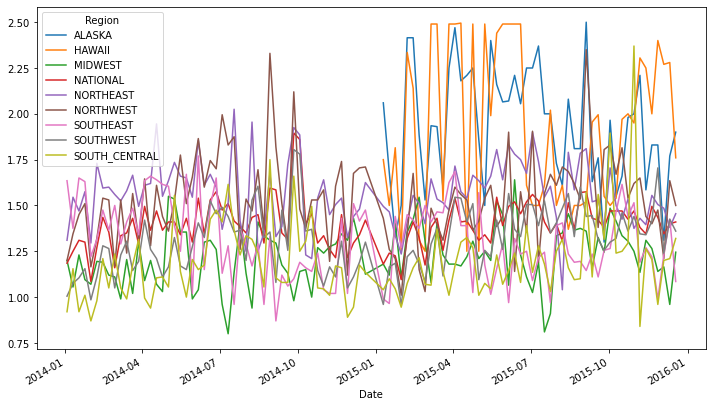

In [ ]:
# What's the regional average price of a HASS avocado every day?
hass = avocados[avocados.Variety == 'HASS']
hass.groupby(['Date', 'Region'])['Weighted Avg Price'].mean().unstack().ffill().plot();

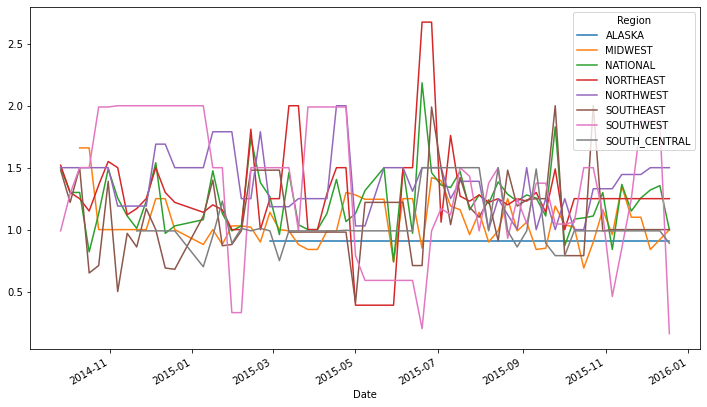

In [ ]:
#ejemplo
greenskin = avocadosex[avocadosex.Variety == 'GREENSKIN']
greenskin.groupby(['Date', 'Region'])['Weighted Avg Price'].mean().unstack().ffill().plot();

In [ ]:
def _organic_spread(group):

    if len(group.columns) != 2:
        return pd.Series(index=group.index, data=0.0)
    
    is_organic = group.columns.get_level_values('Organic').values.astype(bool)
    organics = group.loc[:, is_organic].squeeze()
    non_organics = group.loc[:, ~is_organic].squeeze()
    diff = organics - non_organics
    return diff

def organic_spread_by_region(df):
    """What's the difference between the price of an organic 
    and non-organic avocado within each region?
    """
    return (
        df
        .set_index(['Date', 'Region', 'Organic'])
         ['Weighted Avg Price']
        .unstack(level=['Region', 'Organic'])
        .ffill()
        .groupby(level='Region', axis=1)
        .apply(_organic_spread)
    )

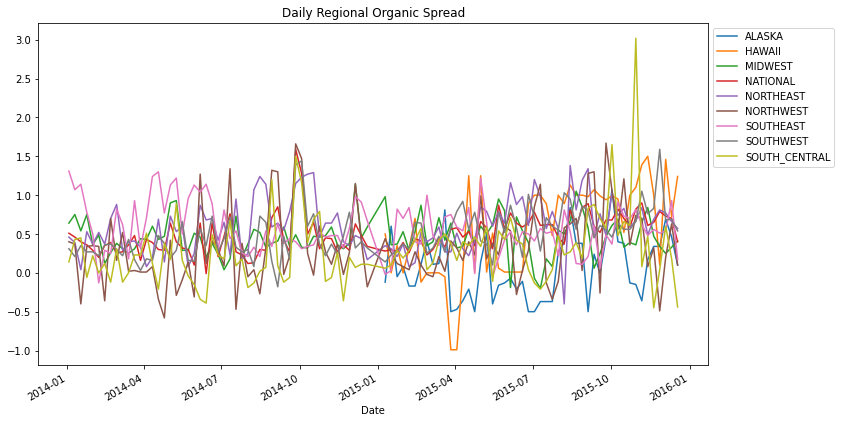

In [ ]:
organic_spread_by_region(hass).plot();
plt.gca().set_title("Daily Regional Organic Spread");
plt.legend(bbox_to_anchor=(1, 1));

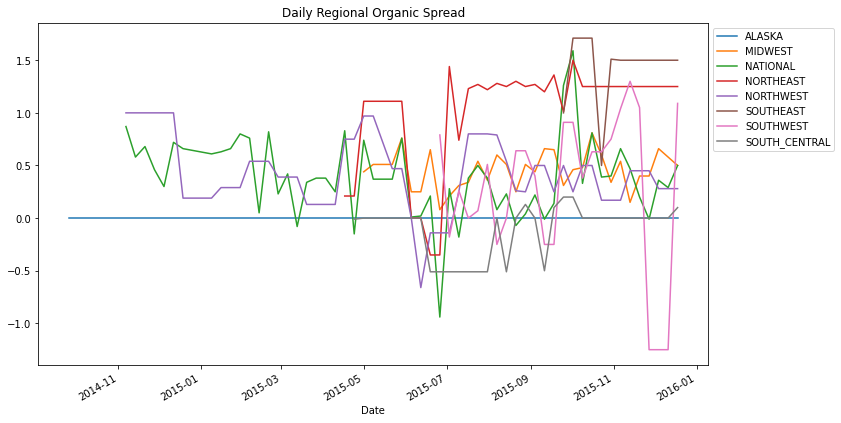

In [ ]:
#ejemplo
organic_spread_by_region(greenskin).plot();
plt.gca().set_title("Daily Regional Organic Spread");
plt.legend(bbox_to_anchor=(1, 1));

In [ ]:
spread_correlation = organic_spread_by_region(hass).corr()
spread_correlation

Region,ALASKA,HAWAII,MIDWEST,NATIONAL,NORTHEAST,NORTHWEST,SOUTHEAST,SOUTHWEST,SOUTH_CENTRAL
Region,,,,,,,,,
ALASKA,1.000000,0.202723,0.175251,0.007844,0.051049,0.087575,0.129079,-0.070868,0.161624
HAWAII,0.202723,1.000000,-0.021116,0.373914,0.247171,0.341155,0.019388,0.159192,0.092632
MIDWEST,0.175251,-0.021116,1.000000,0.062595,-0.010213,-0.043783,0.047437,-0.059128,0.068902
NATIONAL,0.007844,0.373914,0.062595,1.000000,0.502035,0.579102,-0.040539,0.635006,0.486524
NORTHEAST,0.051049,0.247171,-0.010213,0.502035,1.000000,0.242039,-0.236225,0.360389,0.149881
NORTHWEST,0.087575,0.341155,-0.043783,0.579102,0.242039,1.000000,-0.032306,0.165992,0.349935
SOUTHEAST,0.129079,0.019388,0.047437,-0.040539,-0.236225,-0.032306,1.000000,-0.167631,-0.021176
SOUTHWEST,-0.070868,0.159192,-0.059128,0.635006,0.360389,0.165992,-0.167631,1.000000,0.254504
SOUTH_CENTRAL,0.161624,0.092632,0.068902,0.486524,0.149881,0.349935,-0.021176,0.254504,1.000000


In [ ]:
#ejemplo
spread_correlation_greenskin = organic_spread_by_region(greenskin).corr()
spread_correlation_greenskin.fillna(0.0)
spread_correlation_greenskin

Region,ALASKA,MIDWEST,NATIONAL,NORTHEAST,NORTHWEST,SOUTHEAST,SOUTHWEST,SOUTH_CENTRAL
Region,,,,,,,,
ALASKA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MIDWEST,NaN,1.000000,0.326341,0.307174,0.289433,0.041748,-0.346672,0.166863
NATIONAL,NaN,0.326341,1.000000,0.417789,0.299378,0.021097,0.250812,0.401773
NORTHEAST,NaN,0.307174,0.417789,1.000000,0.400814,0.434013,-0.149993,0.248797
NORTHWEST,NaN,0.289433,0.299378,0.400814,1.000000,0.257435,-0.111115,0.004146
SOUTHEAST,NaN,0.041748,0.021097,0.434013,0.257435,1.000000,-0.090884,-0.081374
SOUTHWEST,NaN,-0.346672,0.250812,-0.149993,-0.111115,-0.090884,1.000000,0.179237
SOUTH_CENTRAL,NaN,0.166863,0.401773,0.248797,0.004146,-0.081374,0.179237,1.000000


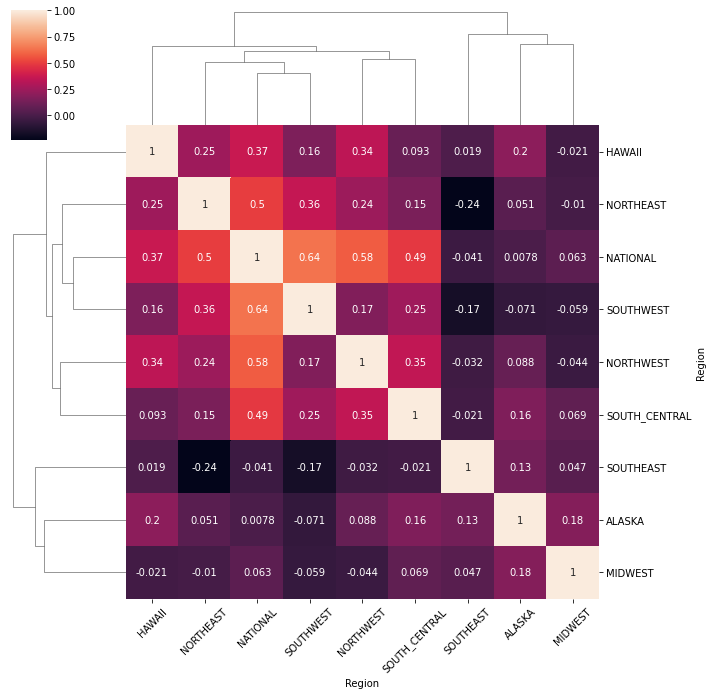

In [ ]:
import seaborn as sns
grid = sns.clustermap(spread_correlation, annot=True)
fig = grid.fig
axes = fig.axes
ax = axes[2]
ax.set_xticklabels(ax.get_xticklabels(), rotation=45);

# Pandas Review

- Pandas extends numpy with more complex datastructures and algorithms.
- If you understand numpy, you understand 90% of pandas.
- `groupby`, `set_index`, and `unstack` are powerful tools for working with categorical data.
- Avocado prices are surprisingly interesting :)

# Thanks!

#Analisis pagina datos Colombia


In [ ]:
data = pd.read_csv('https://raw.githubusercontent.com/josanchezva/AlgorithmsUN2021I/main/Lab2/Reporte_Hurto_por_Modalidades_Polic_a_Nacional.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (2) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:

data

,DEPARTAMENTO,MUNICIPIO,CODIGO DANE,ARMAS MEDIOS,FECHA HECHO,GENERO,GRUPO ETARIO,TIPO DE HURTO,CANTIDAD
0,ATLÁNTICO,BARRANQUILLA (CT),8001000,ARMA BLANCA / CORTOPUNZANTE,1/01/2010,MASCULINO,ADULTOS,HURTO PERSONAS,1
1,BOYACÁ,DUITAMA,15238000,ARMA BLANCA / CORTOPUNZANTE,1/01/2010,MASCULINO,ADULTOS,HURTO PERSONAS,1
2,BOYACÁ,TUNJA (CT),15001000,ARMA BLANCA / CORTOPUNZANTE,1/01/2010,MASCULINO,ADULTOS,HURTO PERSONAS,1
3,CAQUETÁ,FLORENCIA (CT),18001000,ARMA BLANCA / CORTOPUNZANTE,1/01/2010,FEMENINO,ADULTOS,HURTO PERSONAS,1
4,CHOCÓ,QUIBDÓ (CT),27001000,ARMA BLANCA / CORTOPUNZANTE,1/01/2010,MASCULINO,ADULTOS,HURTO PERSONAS,2
...,...,...,...,...,...,...,...,...,...
869409,CUNDINAMARCA,BOGOTÁ D.C. (CT),11001000,LLAVE MAESTRA,31/01/2021,NO APLICA,NO APLICA,HURTO AUTOMOTORES,1
869410,CUNDINAMARCA,BOGOTÁ D.C. (CT),11001000,LLAVE MAESTRA,31/01/2021,NO APLICA,NO APLICA,HURTO AUTOMOTORES,1
869411,CUNDINAMARCA,BOGOTÁ D.C. (CT),11001000,SIN EMPLEO DE ARMAS,31/01/2021,NO APLICA,NO APLICA,HURTO AUTOMOTORES,1
869412,CUNDINAMARCA,BOGOTÁ D.C. (CT),11001000,LLAVE MAESTRA,31/01/2021,NO APLICA,NO APLICA,HURTO AUTOMOTORES,1


In [ ]:
data = data[data.MUNICIPIO == 'BOGOTÁ D.C. (CT)']


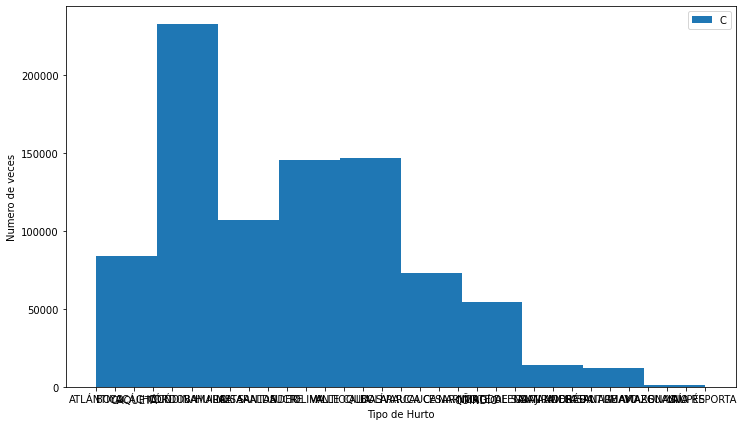

In [ ]:
plt.hist(data['DEPARTAMENTO']);
plt.xlabel('Tipo de Hurto');
plt.ylabel('Numero de veces');
plt.legend('CANTIDAD');